In [1]:
import numpy as np
from pathlib import Path

from pymor.basic import *
from pymor.core.pickle import load

from RBInvParam.problems.problems import build_InstationaryModelIP

set_log_levels({
    'pymor' : 'WARN'
})

set_defaults({})


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cm",
    "font.size": 10,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'figure.dpi': 400
})

In [38]:
#WORK_DIR = Path('/run/media/benedikt/38E84473425D444F/Dokumente/Studium/Mathematik/PhD/parabolische_inverse_probleme')
WORK_DIR = Path('/home/benedikt/Dokumente/parabolische_inverse_probleme')
method = 'TR_IRGNM'
dump_path = WORK_DIR / Path('examples/diffusion/dumps') / f'20250203_142041_TR_IRGNM'
setup_path = dump_path / 'setup.pkl'
data_path = dump_path / f'{method}_4.pkl'
final_data_path = dump_path / f'{method}_final.pkl'

with open(setup_path, 'rb') as file:
    setup = load(file)

if not FOM:
    FOM = build_InstationaryModelIP(setup=setup)

q_exact = setup['model_parameter']['q_exact']

with open(data_path, 'rb') as file:
    data = load(file)

if final_data_path.exists():
    with open(final_data_path, 'rb') as file:
        final_data = load(file)

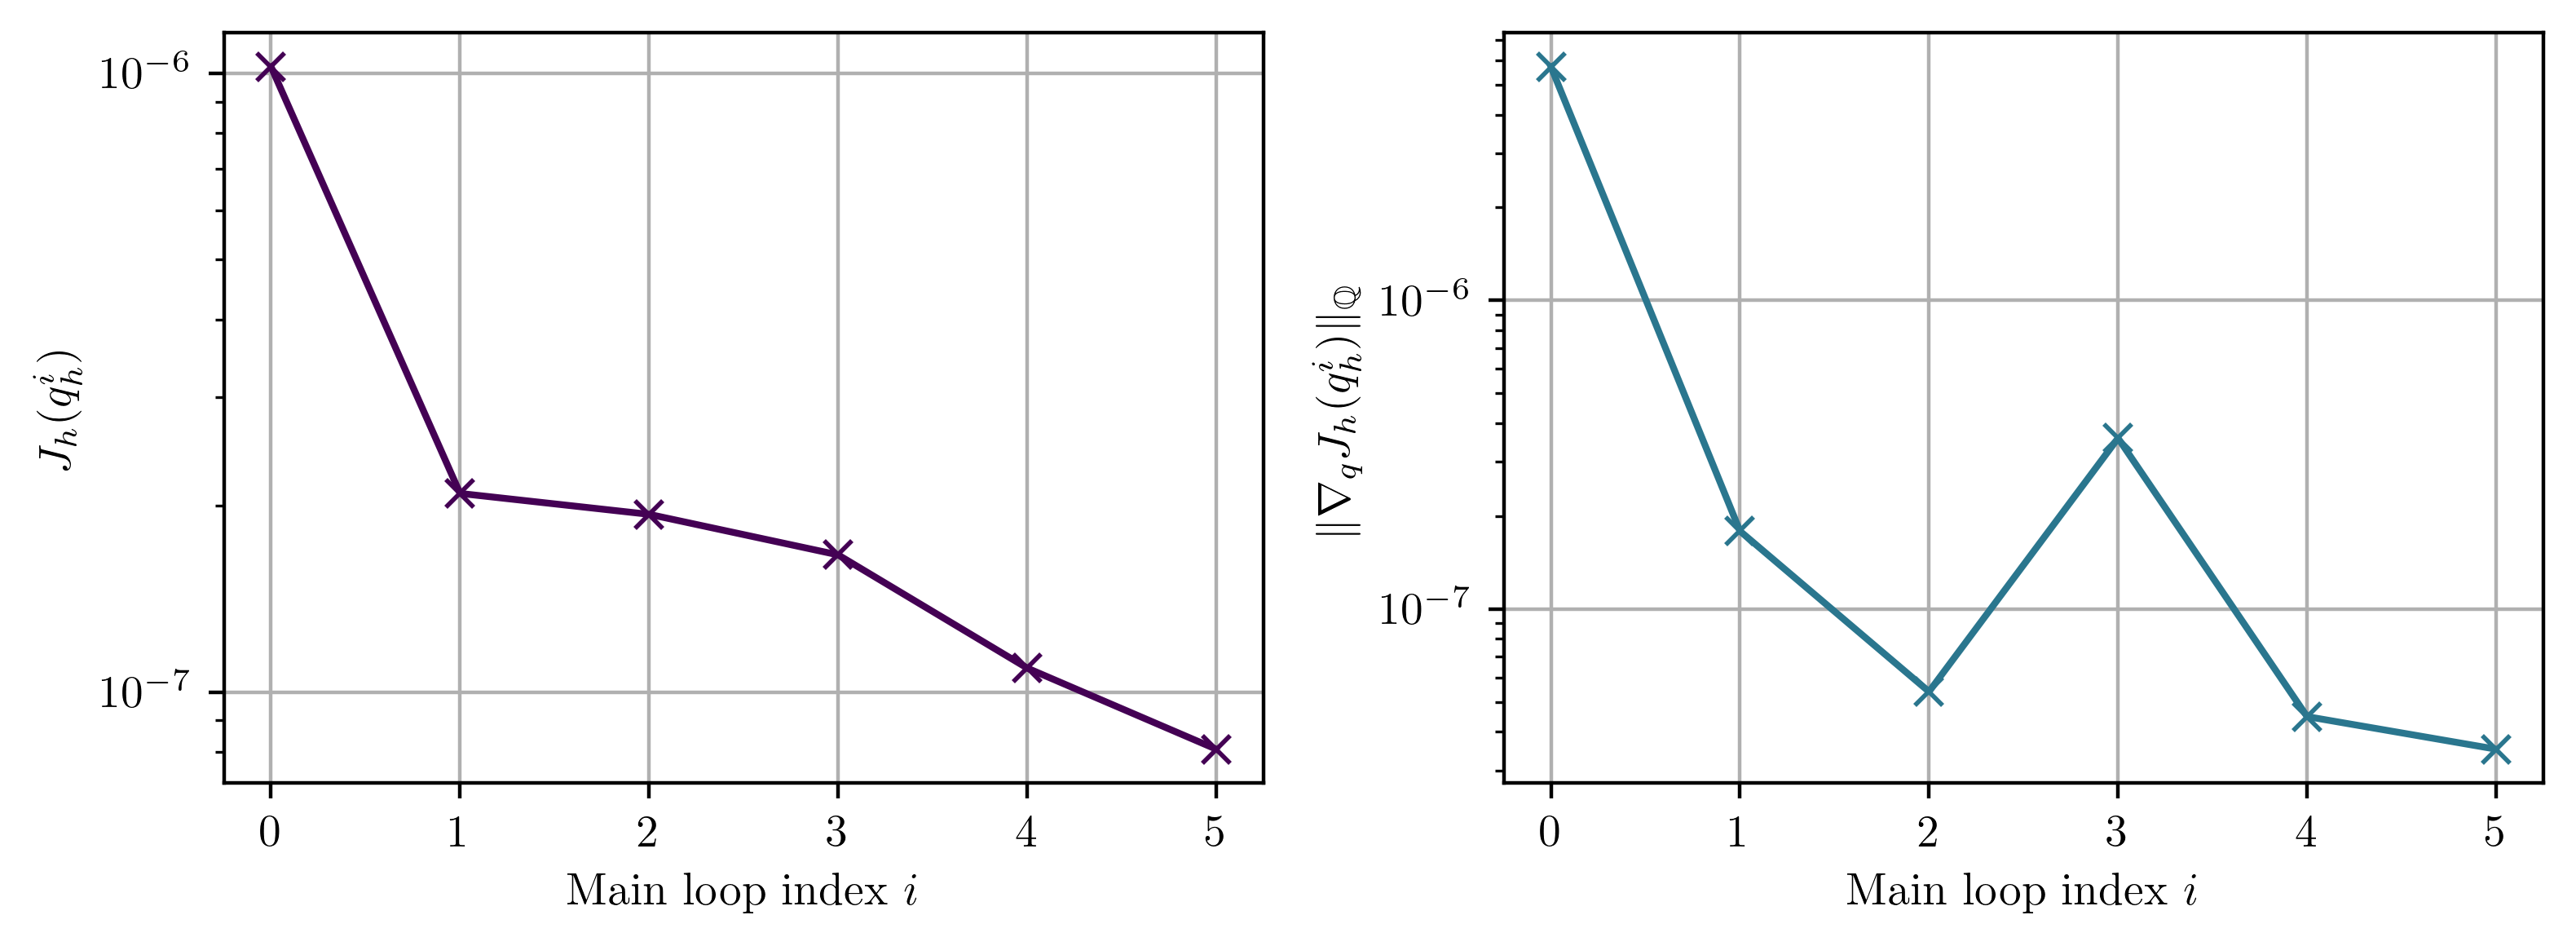

In [40]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,3))
cmap = plt.get_cmap('viridis')

Js = np.array(data['J'])
norm_nabla_Js = np.array(data['norm_nabla_J'])
assert len(Js) == len(norm_nabla_Js)

ax[0].set_xlabel(r'$\textrm{Main loop index } i$')
ax[0].set_ylabel(r'$J_h(q^i_h)$')
ax[0].set_yscale('log')
ax[0].grid()
ax[0].plot(Js, marker='x',color=cmap(0))

ax[1].set_xlabel(r'$\textrm{Main loop index } i$')
if setup['model_parameter']['q_time_dep']:
    ax[1].set_ylabel(r'$\|\nabla_q J_h(q^i_h)\|_{\mathbb{Q}^{K}}$')
else:
    ax[1].set_ylabel(r'$\|\nabla_q J_h(q^i_h)\|_{\mathbb{Q}}$')
    
ax[1].set_yscale('log')
ax[1].grid()
ax[1].plot(norm_nabla_Js, marker='x',color=cmap(100))
##############################


plt.tight_layout()
plt.show()

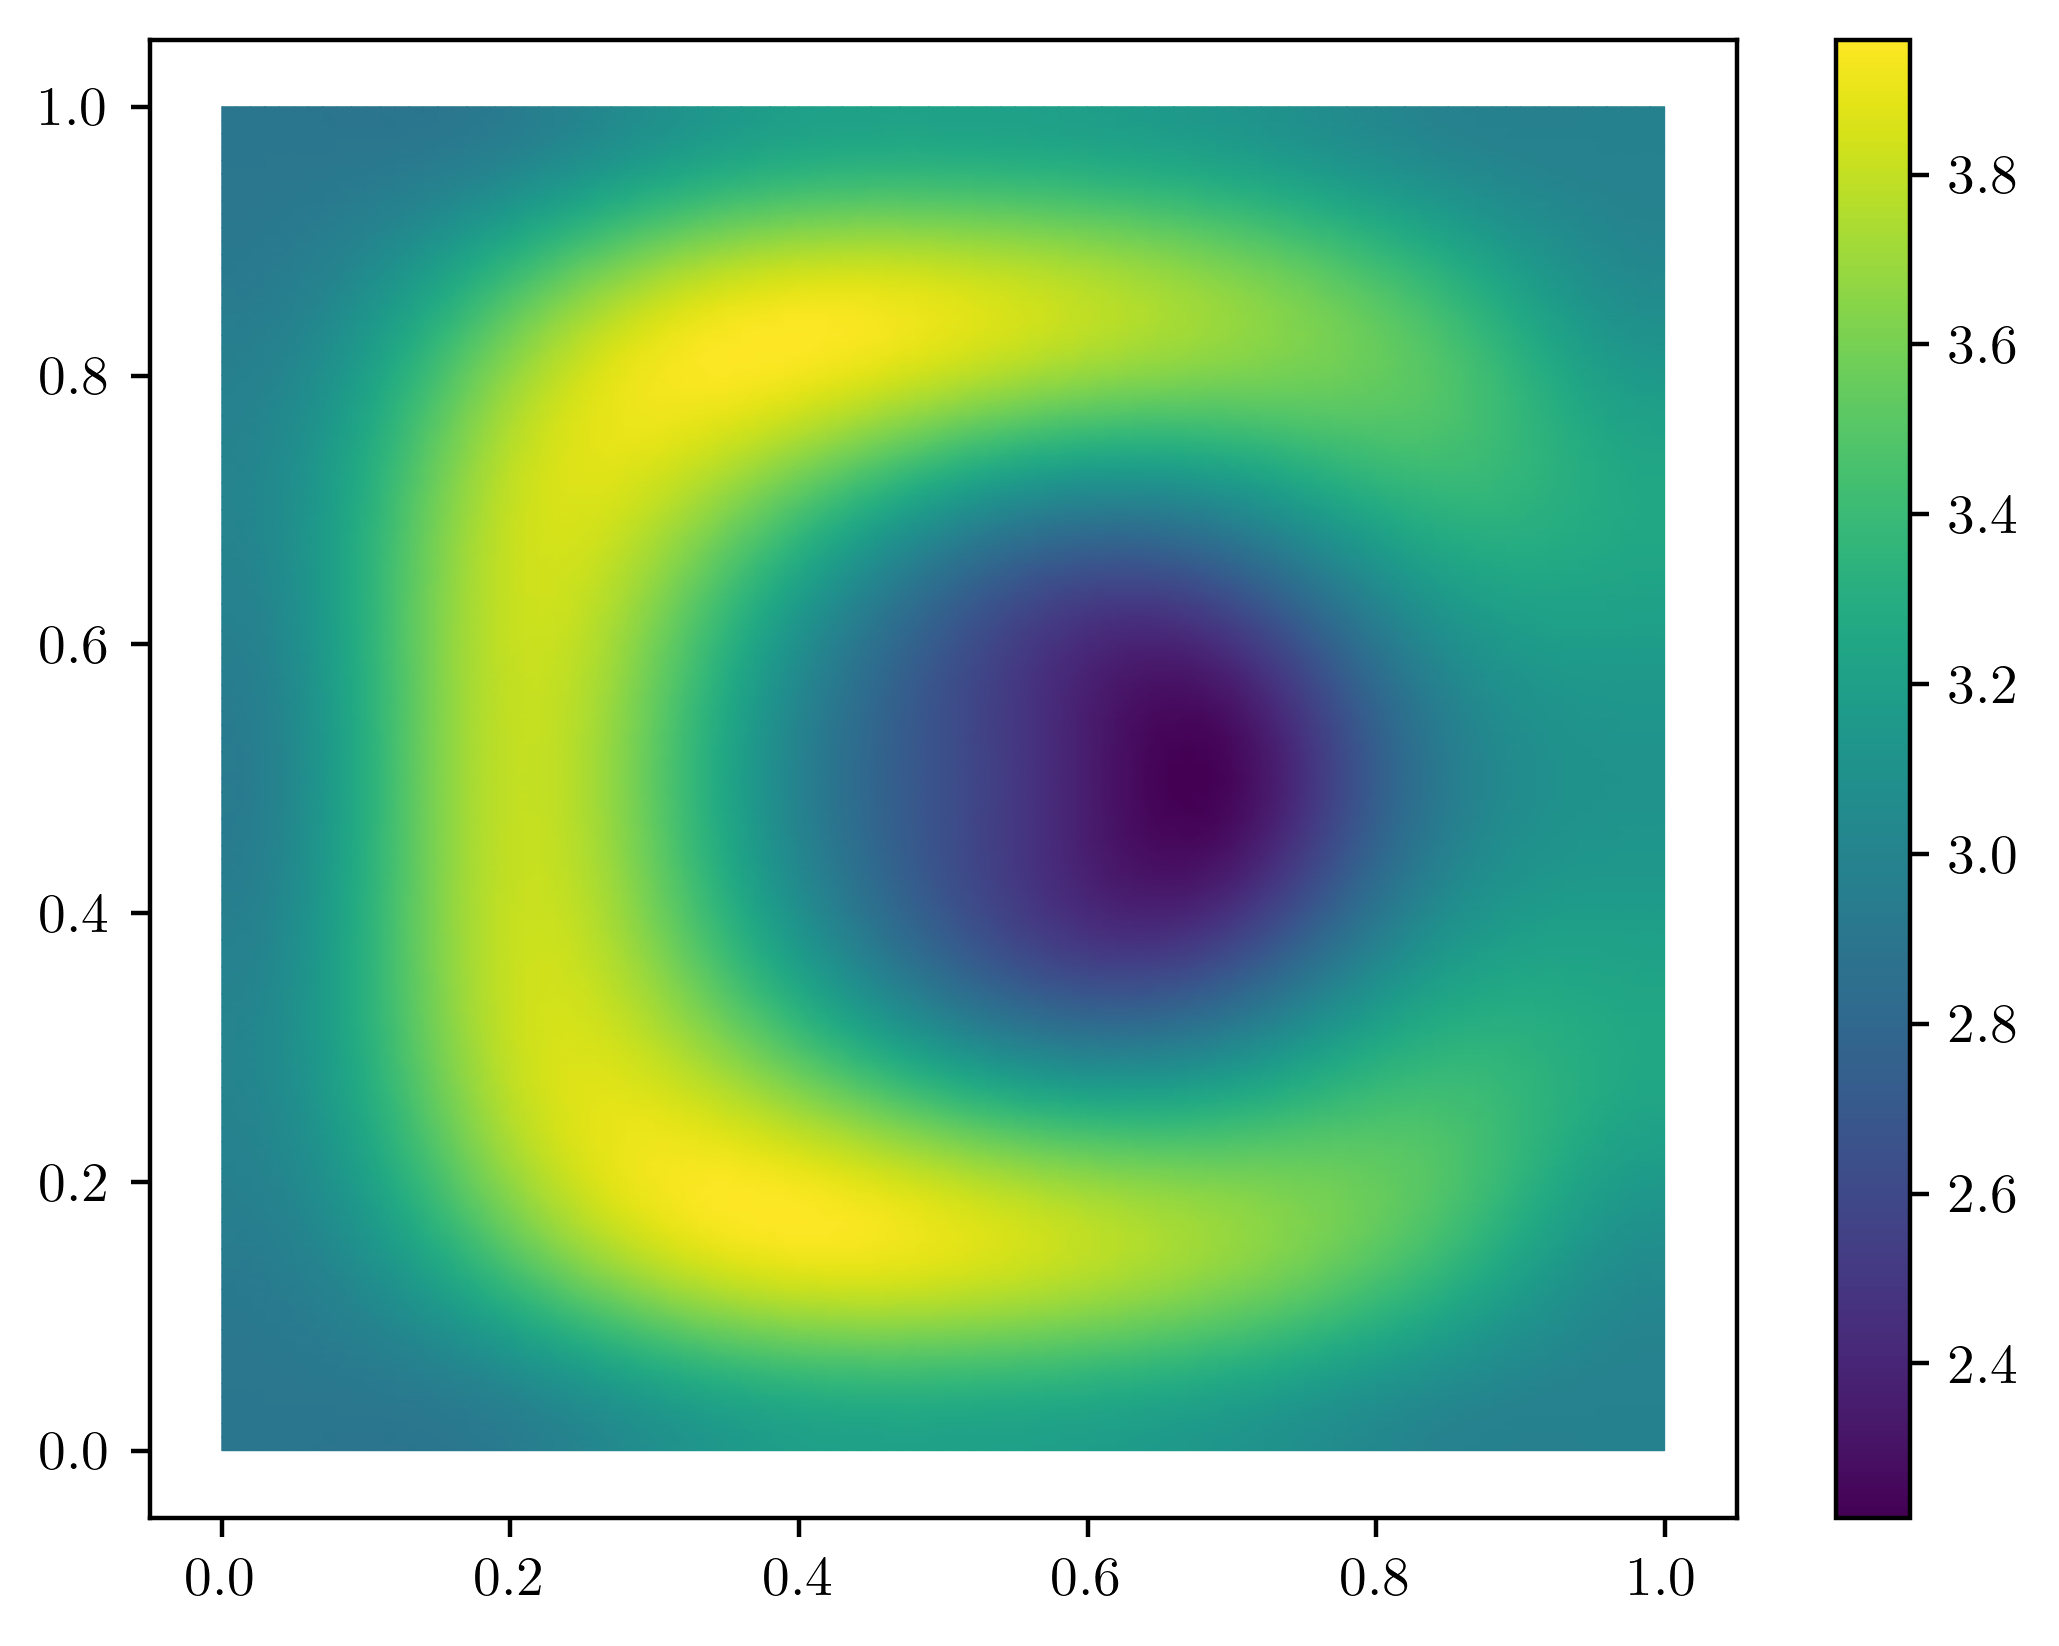

In [41]:
FOM.visualizer.visualize(data['q'][-1])

In [ ]:
u = FOM.solve_state(data['q'][-1])
FOM.visualizer.visualize(u)